In [9]:
import numpy as np
import pandas as pd
import math
#import pylab
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

%matplotlib inline
from sklearn import linear_model, datasets
from sklearn.impute import SimpleImputer
from matplotlib.colors import LinearSegmentedColormap
import gzip
#from Bio import SeqIO
import statsmodels.api as sm
import statsmodels.stats.api as sms

import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from my_functions import *
import random
from sklearn.utils import resample
from sklearn.metrics import r2_score
from decimal import Decimal

matplotlib.rcParams['text.usetex'] = False
#matplotlib.rcParams['mathtext.fontset'] = 'cm'
#matplotlib.rcParams['font.family'] = 'cm'
#matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

# Load disomes Relative growth datasets
preprocessed in notebook 'RG_barplots_dataset_preparation'

In [10]:
# Everything normalized to euploid wt
#RG_WT = pd.read_csv('result_datasets/230601_RG_WT_4repeats_per_disomes.csv', index_col=1)
#RG_ssd1 = pd.read_csv('result_datasets/230601_RG_ssd1_4repeats_per_disomes.csv', index_col=1)

# IMPORTANT
# aneuploid WT normalized to euploid WT, aneupploid ssd1 normalized to euploid ssd1
RG_WT = pd.read_csv('result_datasets/230601_RGWT_disWT_4repeats_per_disomes.csv')
RG_ssd1 = pd.read_csv('result_datasets/230601_RGssd1_disssd1_4repeats_per_disomes.csv')

test_WT = pd.read_csv('result_datasets/220919_double_disomes_WT_3repeats.csv', index_col=1)
test_ssd1 = pd.read_csv('result_datasets/220919_double_disomes_ssd1_3repeats.csv', index_col=1)

In [11]:
RG_ssd1 = RG_ssd1[RG_ssd1['Chromosome'] != 16]

In [12]:
eup = {'Chromosome':['Eupl.', 'Eupl.'], 
        'MEAN RG':[100, 100], 
        'Genotype':['WT', 'ssd1']} 
  
eup = pd.DataFrame(eup) 

In [13]:
tmp = RG_WT[['Chromosome','MEAN RG']]
tmp['Genotype'] = 'WT'
tmp_s = RG_ssd1[['Chromosome', 'MEAN RG']]
tmp_s['Genotype'] = 'ssd1'

C:\Users\user\AppData\Local\Temp\ipykernel_17412\3875014520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Genotype'] = 'WT'
C:\Users\user\AppData\Local\Temp\ipykernel_17412\3875014520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_s['Genotype'] = 'ssd1'


In [14]:
tmp.loc[len(tmp.index)] = [6, 0, 'WT'] 
tmp.loc[len(tmp.index)] = [6, 0, 'ssd1'] 

C:\Users\user\AppData\Local\Temp\ipykernel_17412\3026383463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[len(tmp.index)] = [6, 0, 'WT']
C:\Users\user\AppData\Local\Temp\ipykernel_17412\3026383463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[len(tmp.index)] = [6, 0, 'ssd1']


In [15]:
# temporary dataset to make barplot of aneuploid relative growth
tmp = tmp.sort_values('Chromosome')
tmp = pd.concat([eup, tmp, tmp_s], axis=0)

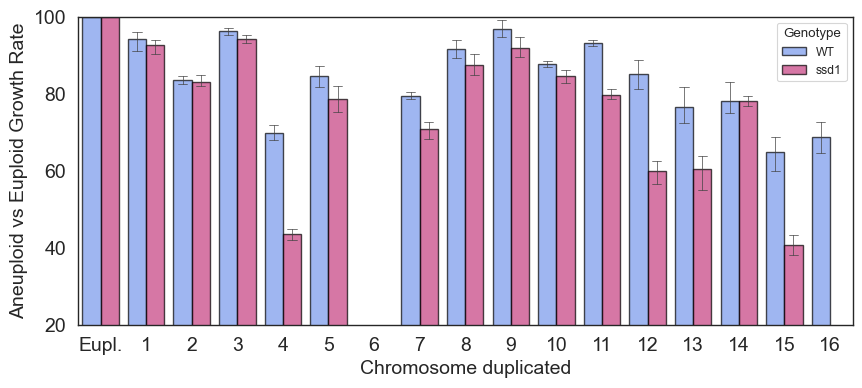

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1)

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(x = 'Chromosome',
            y = 'MEAN RG',
            hue = 'Genotype',
            data = tmp, palette = ['#648FFF', '#DC267F'], alpha=0.7, linewidth=1, edgecolor='black', capsize=0.2, errwidth=0.5, width =0.8)

ax.set_xlabel('Chromosome duplicated', fontsize=14)
ax.set_ylabel('Aneuploid vs Euploid Growth Rate', fontsize=14)
ax.set_ylim([20, 100])
ax.set_axisbelow(True)
#ax.set_title('Disomies fitness cost', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)
#ax.grid(axis='y')
plt.savefig('plots/RG_barplot_RG_to_WT_or_ssd1del.svg')
plt.show()

# Show the plot
plt.show()

# Load MoBy and YPS1009 gene annotation

In [17]:
# load a list of yps1009 annotated genes 
genes_yps = pd.read_csv('datasets/yps1009_genes_final.txt', index_col=0, sep='\t')
genes = genes_yps[genes_yps['orf_classification'] != 'Dubious']
# Load the normalized moby data file from Auguste
moby = pd.read_csv('datasets/EUwt.txt', sep="\t", index_col=0)
genes = genes.join(moby)

In [18]:
genes.isna().sum()

gene                   584
Chromosome               0
orf_classification       2
logFC                 1359
logCPM                1359
F                     1359
PValue                1359
FDR                   1359
dtype: int64

In [19]:
# How maby genes measured in MoBy. names with _ aren't included
g = []
for m in moby.index:
    if '_' not in m:
        g.append(m)

In [20]:
# empty vector plus 4462 genes
len(g)

4463

In [21]:
mobyC = moby.join(genes[['Chromosome']]).dropna()

meta NOT subset; don't know how to subset; dropped


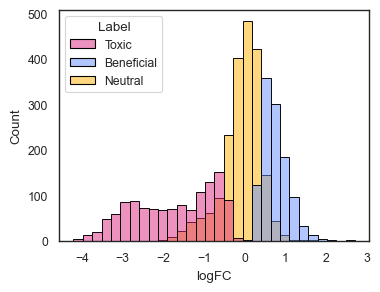

In [23]:
# Distribution of genes fitness cost (logFC)
Label = []
for index, row in mobyC.iterrows():
    if row['logFC'] < 0 and row['FDR'] < 0.05:
        Label.append('Toxic')
    elif row['logFC'] > 0 and row['FDR'] < 0.05:
        Label.append('Beneficial')   
    else:
        Label.append('Neutral')
mobyC['Label'] = Label

fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(data=mobyC, x="logFC", hue='Label', bins=30, palette=["#DC267F", "#648FFF",  "#FFB000"], edgecolor = 'black')
fig.savefig('plots/moby_histogram_benef_toxic.pdf', bbox_inches='tight')

meta NOT subset; don't know how to subset; dropped


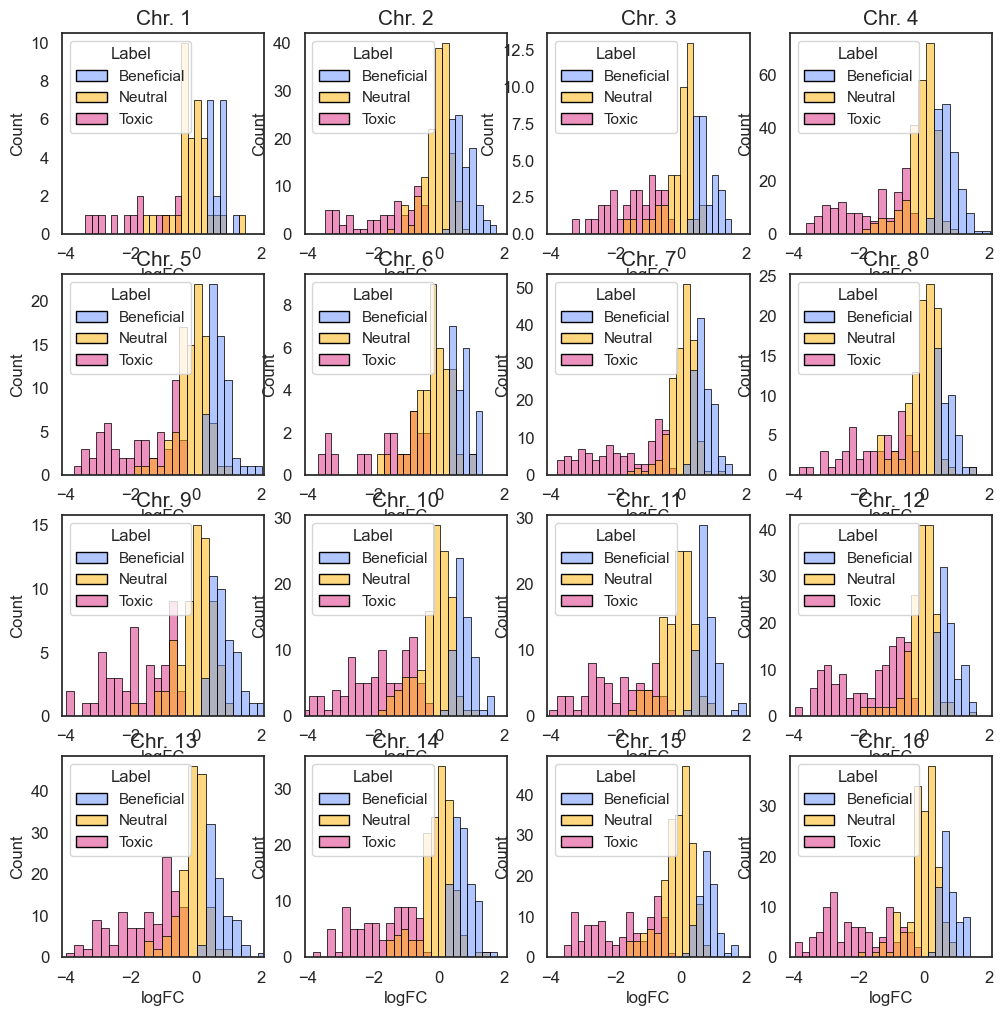

In [24]:
# logFC distribution per chromosome
sns.set(rc={'figure.figsize': (12, 12)})
sns.set_style("white")
columns = 4
rows = 4
count = 1
fig, ax = plt.subplots(rows, columns)
for x in range(rows):
    if count <= 16:
        for y in range(columns):
            if count <=16:
                sns.histplot(data=mobyC[mobyC.Chromosome == count].sort_values('Label'), x="logFC", ax=ax[x, y], hue='Label', bins=25, palette=[ "#648FFF", "#FFB000", "#DC267F"], edgecolor='black')
                ax[x, y].set_title('Chr. ' + str(count), fontsize=15)
                ax[x, y].tick_params(labelsize=12)
                #ax[x,y].set_ylim(0, 75)
                ax[x,y].set_xlim(-4.1, 2.1)
                count += 1

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for a in ax.flat:
#    a.label_outer()

fig.savefig('plots/gene_fitness_hist_by_chr_v2.pdf', bbox_inches='tight')

In [28]:
sign = mobyC[mobyC.FDR < 0.05]
neg = sign[sign.logFC < 0]
pos = sign[sign.logFC > 0]
print('toxic genes: ', neg.shape[0])
print('beneficial genes: ', pos.shape[0])

toxic genes:  1229
beneficial genes:  1115


In [29]:
print('toxic genes %: ', neg.shape[0]/mobyC.shape[0]*100)
print('beneficial genes %: ', pos.shape[0]/mobyC.shape[0]*100)

toxic genes %:  28.130006866559853
beneficial genes %:  25.520714122224764


In [30]:
# Function plotting linear regression between growth rates and other features
# Take two dataset (RG_WT and RG_ssd1) and the name of the features to plot (need to be the same name in both dataset)
# ax_l = list containing the list label
def Fitlin_mean2(RG1, RG2, cx, cy, ax_l, filenamesvg=None, labels=True,  alpha=1):
    X1 = list(RG1[cx])
    y1 = list(RG1[cy])
    
    X2 = list(RG2[cx])
    y2 = list(RG2[cy])
    
    colors = ['#648FFF', '#DC267F']
    # fit the linear regression
    f, ax = plt.subplots()
    ax.set(xlim=(min((X1+X2))-15, max((X1+X2))+15), ylim=(min((y1+y2))-10, max((y1+y2))+10))
    sns.regplot(x=cx, y=cy, data=RG1, label=RG1.index, truncate=False, scatter=False,
                color=colors[0])
    sns.regplot(x=cx, y=cy, data=RG2, label=RG2.index, truncate=False, scatter=False,
                color=colors[1])
    # mean of replicates and plot the mean RG against the x feature as scatter
    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)
    
    mean2 = RG2.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean2, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1[cx])
    n1 = list(mean1['Chromosome'])
    
    y_m2 = list(mean2[cy])
    x_m2 = list(mean2[cx])
    n2 = list(mean2['Chromosome'])
    # label the scatter points 
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + 10, y_m1[i] + 1, n1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)
        for i in range(len(n2)):
            ax.text(x_m2[i] + 10, y_m2[i] + 1, n2[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)
    
    # To print the R2           
    X1 = sm.add_constant(X1)
    results1 = sm.OLS(y1, X1).fit()
    
    X2 = sm.add_constant(X2)
    results2 = sm.OLS(y2, X2).fit()

    patch1 = mpatches.Patch(color=colors[0], label= r'$WT - adj. R^2 : $ '  +  str(round(results1.rsquared_adj, 2)))
    patch2 = mpatches.Patch(color=colors[1], label= r'$ssd1\Delta - adj. R^2 : $ ' +  str(round(results2.rsquared_adj, 2)))

    plt.legend(handles=[patch1, patch2], fontsize= 13, loc='lower left')

    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.show()
    
    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
        
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)
    
    print('Parameters ssd1: ', results2.params)
    print('R2 ssd1: ', results2.rsquared)
    print('Adjusted R2 ssd1: ', results2.rsquared_adj)
    print('F p-value ssd1: ', results2.f_pvalue)

    return results1, results2

In [31]:
# plot single chromosome duplication used to fit the linear regression and the double disomes used as test set 
def Fitlin_mean_test(RG1, RG2, test1, test2, cx, cy, ax_l, filenamesvg=None, labels=True,  alpha=1):
    X1 = list(RG1[cx])
    y1 = list(RG1[cy])
    
    X2 = list(RG2[cx])
    y2 = list(RG2[cy])
    
    Xt1 = list(test1[cx])
    yt1 = list(test1[cy])
    
    Xt2 = list(test2[cx])
    yt2 = list(test2[cy])
    
    colors = ['#648FFF', '#DC267F']      

    
    f, ax = plt.subplots()
    ax.set(xlim=(min((X1+X2+Xt1+Xt2))-15, max((X1+X2+Xt1+Xt2))+15), ylim=(min((y1+y2+yt1+yt2))-10, max((y1+y2+yt1+yt2))+10))
    sns.regplot(x=cx, y=cy, data=RG1, label=RG1.index, truncate=False, scatter=False,
                color=colors[0])
    sns.regplot(x=cx, y=cy, data=RG2, label=RG2.index, truncate=False, scatter=False,
                color=colors[1])
    
    # ploting the mean RG of each chromosome
    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)
    
    mean2 = RG2.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean2, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1[cx])
    n1 = list(mean1['Chromosome'])
    
    y_m2 = list(mean2[cy])
    x_m2 = list(mean2[cx])
    n2 = list(mean2['Chromosome'])
    
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + 10, y_m1[i] + 1, n1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)
        for i in range(len(n2)):
            ax.text(x_m2[i] + 10, y_m2[i] + 1, n2[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)

    # Plotting the test set
    test_mean1 = test1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=test_mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)

    test_mean2 = test2.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=test_mean2, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    yt_m1 = list(test_mean1[cy])
    xt_m1 = list(test_mean1[cx])
    nt1 = list(test_mean1['Chromosome'])
    
    yt_m2 = list(test_mean2[cy])
    xt_m2 = list(test_mean2[cx])
    nt2 = list(test_mean2['Chromosome'])
    
    if labels:
        for i in range(len(nt1)):
            ax.text(xt_m1[i] - 10, yt_m1[i] - 4, nt1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)
        for i in range(len(nt2)):
            ax.text(xt_m2[i] - 10, yt_m2[i] - 4, nt2[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)
    
    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()
    
    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
        
    # Fit OLS model to print the stats     
    X1 = sm.add_constant(X1)
    results1 = sm.OLS(y1, X1).fit()
    
    X2 = sm.add_constant(X2)
    results2 = sm.OLS(y2, X2).fit()
           
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)
    
    print('Parameters ssd1: ', results2.params)
    print('R2 ssd1: ', results2.rsquared)
    print('Adjusted R2 ssd1: ', results2.rsquared_adj)
    print('F p-value ssd1: ', results2.f_pvalue)
    
    # Predict the test set (double disomes)
    
    Xt1 = sm.add_constant(Xt1)
    yt_pred1 = results1.predict(Xt1)
    yt_p_np1 = np.array(yt_pred1)
    yt_np1 = np.array(yt1)
    
    Xt2 = sm.add_constant(Xt2)
    yt_pred2 = results2.predict(Xt2)
    yt_p_np2 = np.array(yt_pred2)
    yt_np2 = np.array(yt2)

    return results1, results2

In [32]:
def Fitlin_mean_1test(RG1, test1, cx, cy, ax_l, filenamesvg=None, labels=True,  alpha=1):
    X1 = list(RG1[cx])
    y1 = list(RG1[cy])

    Xt1 = list(test1[cx]) 
    yt1 = list(test1[cy])
    
    colors = ['#648FFF', '#FE6100']
    
    # plotting the linear regression
    #sns.set(rc={'figure.figsize':(4.5,3.5)})
    #sns.set_style("white")
    #sns.set_style('white', rc={
    #'xtick.bottom': True,
    #'ytick.left': True,
    #})          

    f, ax = plt.subplots()
    ax.set(xlim=(min((X1+Xt1))-15, max((X1+Xt1))+15), ylim=(min((y1+yt1))-10, max((y1+yt1))+10))
    sns.regplot(x=cx, y=cy, data=RG1, label=RG1.index, truncate=False, scatter=False,
                color=colors[0])

    # ploting the mean RG of each chromosome
    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1[cx])
    n1 = list(mean1['Chromosome'])
        
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + 10, y_m1[i] + 1, n1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)

    # Plotting the test set
    test_mean1 = test1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x=cx, y=cy, data=test_mean1, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    yt_m1 = list(test_mean1[cy])
    xt_m1 = list(test_mean1[cx])
    nt1 = list(test_mean1['Chromosome'])
    
    if labels:
        for i in range(len(nt1)):
            ax.text(xt_m1[i] - 10, yt_m1[i] - 4, nt1[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)
   
    
    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Fit OLS model to print the stats     
    X1 = sm.add_constant(X1)
    results1 = sm.OLS(y1, X1).fit()    
           
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)

    # Predict the test set (double disomes)   
    Xt1 = sm.add_constant(Xt1)
    yt_pred1 = results1.predict(Xt1)
    yt_p_np1 = np.array(yt_pred1)
    yt_np1 = np.array(yt1)
    
    patch1 = mpatches.Patch(color=colors[0], label= r'Train set - $adj. R^2 : $ '  +  str(round(results1.rsquared_adj, 2)))
    patch2 = mpatches.Patch(color=colors[1], label= r'Test set - $adj. R^2 : $ ' +  str(round((1-((1-r2_score(yt_np1, yt_p_np1))*(len(Xt1)-1))/(len(Xt1)-1 -1)) ,2)))

    plt.legend(handles=[patch1, patch2], fontsize= 13,  loc='lower left')
    plt.show()
        
    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
    
    print()
    print('R2 score of test set: ', r2_score(yt_np1, yt_p_np1))
    print('Adjusted R2 of test set: ',round((1-((1-r2_score(yt_np1, yt_p_np1))*(len(Xt1)-1))/(len(Xt1)-1 -1)) ,3))
    return results1

In [33]:
# sum the gene features for chromosome(s) 
def Chr_to_disomes(RG, Chr_feat, column_name):
    orf = []
    for ind, row in RG.iterrows():
        dis = row['Chromosome'].split(';')
        genes = 0
        for d in dis:
            genes += Chr_feat._get_value(int(d), column_name)
        orf.append(genes)
    RG[column_name] = orf
    return RG

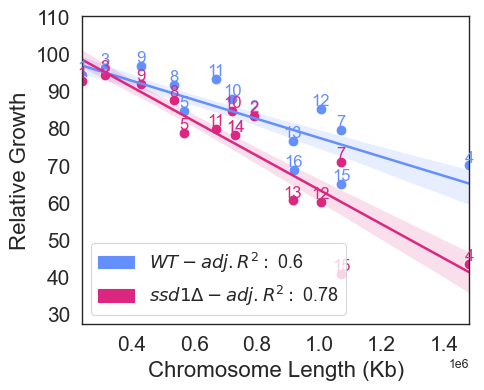

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02953718e+02 -2.55908942e-05]
R2 WT:  0.6109406689782395
Adjusted R2 WT:  0.6042327494778643
F p-value WT:  1.703400074984191e-13
Parameters ssd1:  [ 1.09480286e+02 -4.61224626e-05]
R2 ssd1:  0.779704120918844
Adjusted R2 ssd1:  0.7756245676025263
F p-value ssd1:  2.2221562023517256e-19


In [34]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m0_wt, m0_ssd1 = Fitlin_mean2(RG_WT, RG_ssd1, 'Chr length', 'MEAN RG', ['Chromosome Length (Kb)','Relative Growth'], filenamesvg='plots/model0_chrL_melted_final.pdf')

Parameters:  [17348.41287218  1994.93211165]
R2:  0.9947682777211767
Adjusted R2:  0.9946780756129211
F p-value:  7.246877954375068e-68


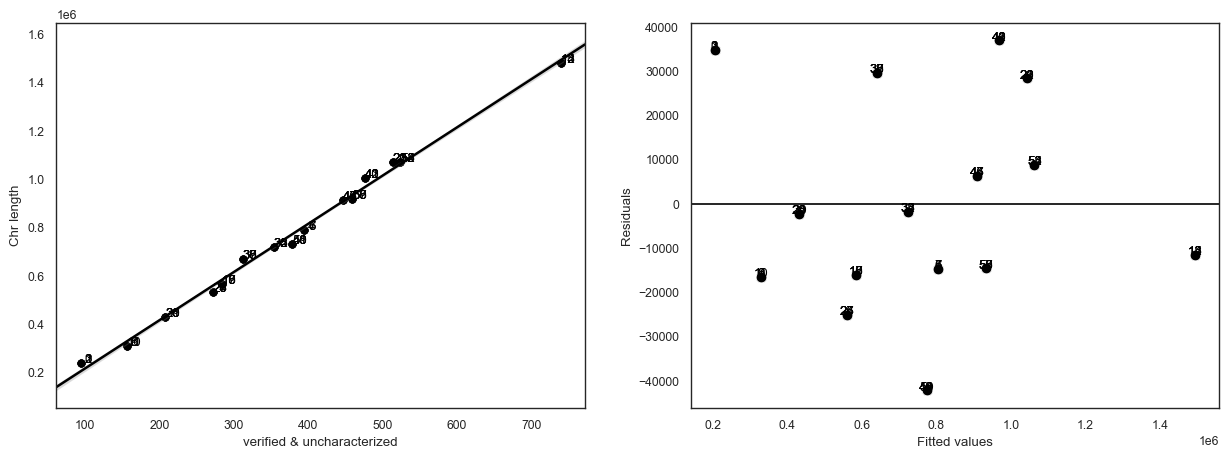

In [36]:
# Check YPS1009 correlation between the number of gene and chromosome length
Fitlin(RG_WT, 'verified & uncharacterized', 'Chr length')

# Model 1: Number of duplicated genes

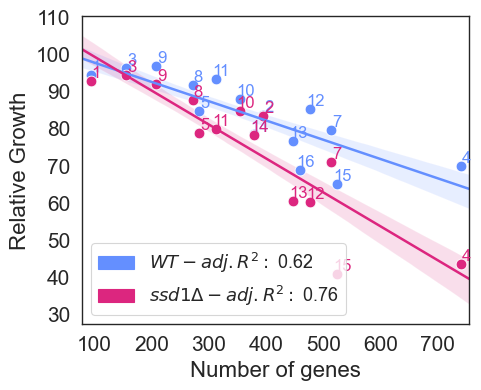

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02868196e+02 -5.20096372e-02]
R2 WT:  0.6307560820914563
Adjusted R2 WT:  0.6243898076447573
F p-value WT:  3.6844149898913977e-14
Parameters ssd1:  [ 1.08459627e+02 -9.15425815e-02]
R2 ssd1:  0.7650445311970104
Adjusted R2 ssd1:  0.7606935039969551
F p-value ssd1:  1.2768744163565084e-18


In [35]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m0_wt, m0_ssd1 = Fitlin_mean2(RG_WT, RG_ssd1, 'verified & uncharacterized', 'MEAN RG', ['Number of genes','Relative Growth'], filenamesvg='plots/model0_numbergenes_melted_final.pdf')

Parameters WT:  [ 1.02868196e+02 -5.20096372e-02]
R2 WT:  0.6307560820914563
Adjusted R2 WT:  0.6243898076447573
F p-value WT:  3.6844149898913977e-14


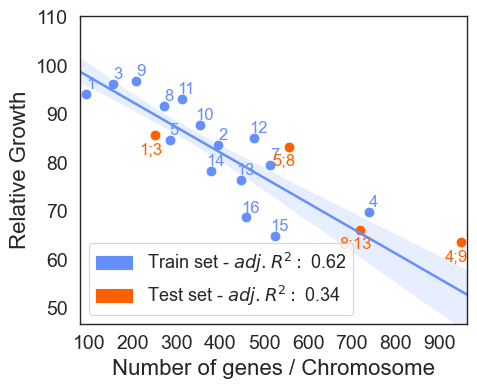

meta NOT subset; don't know how to subset; dropped



R2 score of test set:  0.3997728864469111
Adjusted R2 of test set:  0.34


In [37]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
Fitlin_mean_1test(RG_WT, test_WT,  'verified & uncharacterized', 'MEAN RG', ['Number of genes / Chromosome','Relative Growth'], filenamesvg='plots/model1_WT_melted_test.pdf')

# Model 2: Moby score
Impute missing genes that are missing and not significant genes (that will be model 2 for the paper

### Distinguish genes missing from library or from Auguste's dataset

In [38]:
sign = genes[genes.FDR < 0.05]
neg = sign[sign.logFC < 0]
pos = sign[sign.logFC > 0]
print('toxic genes: ', neg.shape[0])
print('beneficial genes: ', pos.shape[0])

toxic genes:  1229
beneficial genes:  1115


In [39]:
# Loa genes included in the MoBy 1.0 dataset
full_moby = pd.read_csv('datasets/MoBY-ORF_v1_0.csv', sep='\t', index_col=0)
missing_from_library = set(genes.index) - set(full_moby.index)
len(missing_from_library)

848

In [40]:
gene_moby = genes.dropna(subset='logFC')
missing_from_experiment = set(full_moby.index) - set(gene_moby.index)
len(missing_from_experiment)

624

In [41]:
# remove mithochondrial
genes = genes[genes['Chromosome'] != 'mitoch']
# get chromosome as interger
genes['Chromosome'] = genes['Chromosome'].apply(int)

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
quant025 = genes['logFC'].quantile(0.025)
mean1 = genes['logFC'].mean()
# Impute missing genes
genes['model2'] = genes['logFC']
tofill = list(genes[np.isnan(genes['model2'])].index)
for ind in tofill:
    if ind in full_moby.index:
        genes['model2'][ind] = quant025
    else:
        genes['model2'][ind] = mean1
        
# not significant values are replaced by mean(moby logFC)
genes.loc[genes.FDR > 0.05, 'model2'] = mean1 # test FDR, 0.05

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['model2']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2']] , on="Chromosome")
RG_WT['model2-'] = RG_WT['model2'] *-1
RG_ssd1['model2-'] = RG_ssd1['model2'] *-1

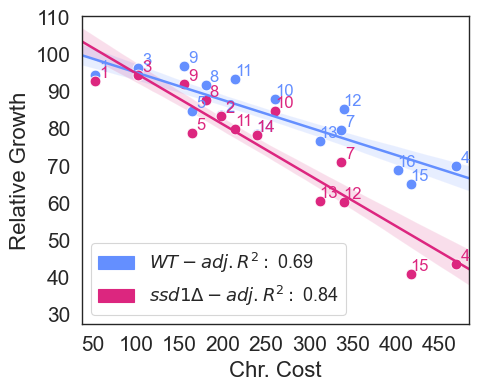

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02401314e+02 -7.41850957e-02]
R2 WT:  0.6966459871693087
Adjusted R2 WT:  0.6914157455687795
F p-value WT:  1.1756878951945922e-16
Parameters ssd1:  [108.47348002  -0.1372606 ]
R2 ssd1:  0.8466131317297367
Adjusted R2 ssd1:  0.8437726341691762
F p-value ssd1:  1.2155608599293337e-23


In [44]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_wt, m3_ssd1 = Fitlin_mean2(RG_WT, RG_ssd1,  'model2-', 'MEAN RG', ['Chr. Cost','Relative Growth'], filenamesvg='plots/model2_chr_cost_melted_final.pdf')

Parameters WT:  [ 1.02401314e+02 -7.41850957e-02]
R2 WT:  0.6966459871693087
Adjusted R2 WT:  0.6914157455687795
F p-value WT:  1.1756878951945922e-16


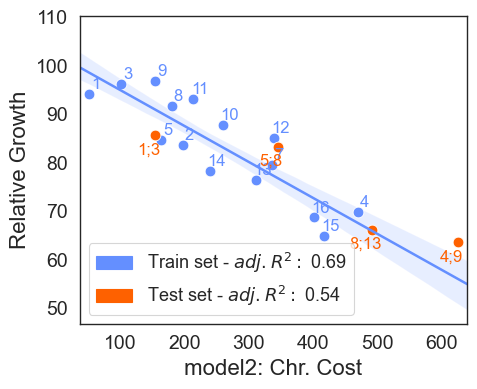

meta NOT subset; don't know how to subset; dropped



R2 score of test set:  0.5774319733507403
Adjusted R2 of test set:  0.535


In [45]:
test_WT = Chr_to_disomes(test_WT, G, 'model2')
test_ssd1 = Chr_to_disomes(test_ssd1, G, 'model2')
test_WT['model2-'] = test_WT['model2']*-1
test_ssd1['model2-'] = test_ssd1['model2']*-1

sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
Fitlin_mean_1test(RG_WT, test_WT,  'model2-', 'MEAN RG', ['model2: Chr. Cost','Relative Growth'], filenamesvg='plots/model2_melted_final_testWT.pdf')

In [46]:
RG_WT['m2/gene number'] = RG_WT['model2-']/RG_WT['verified & uncharacterized']

In [47]:
Label = []
Num = []
for index, row in genes.iterrows():
    if row['logFC'] < 0 and row['FDR'] <= 0.05:
        Label.append('Toxic')
        Num.append(1)
    else:
        Label.append('Neutral')
        Num.append(0)
genes['Label'] = Label
genes['Numeric Label'] = Num

# model2_2: no beneficial scores
Positive scores are replaced by 0 and test if beneficial genes are statistically significant


In [48]:
genes['model2_2'] = genes['model2']
genes.loc[genes['model2_2'] > 0, 'model2_2'] = 0

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['model2_2']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_2']] , on="Chromosome")
RG_WT['model2_2-'] = RG_WT['model2_2'] *-1
RG_ssd1['model2_2-'] = RG_ssd1['model2_2'] *-1

In [46]:
genes.to_csv('result_datasets/Moby_imputed_model2.csv')

## Nested model: 2 vs 2-2
### 1) sum(negative-neutral genes) + sum(positive genes)

In [50]:
genes['model2_neg'] = genes['model2']
genes.loc[genes['model2_neg'] > 0, 'model2_neg'] = 0
genes['model2_pos'] = genes['model2']
genes.loc[genes['model2_pos'] < 0, 'model2_pos'] = 0

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['model2_neg']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_neg']] , on="Chromosome")
RG_WT['model2_neg-'] = RG_WT['model2_neg'] *-1
RG_ssd1['model2_neg-'] = RG_ssd1['model2_neg'] *-1

RG_WT = pd.merge(RG_WT, G[['model2_pos']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_pos']] , on="Chromosome")
RG_WT['model2_pos-'] = RG_WT['model2_pos'] *-1
RG_ssd1['model2_pos-'] = RG_ssd1['model2_pos'] *-1

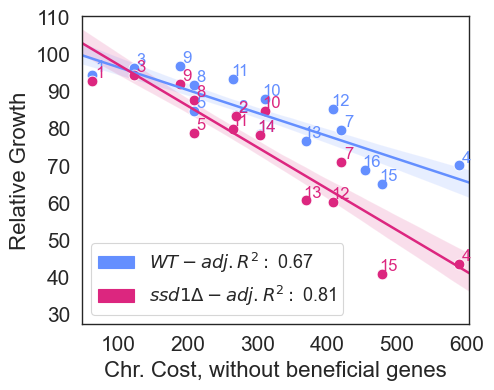

meta NOT subset; don't know how to subset; dropped


Parameters WT:  [ 1.02616283e+02 -6.18014311e-02]
R2 WT:  0.6787658555585809
Adjusted R2 WT:  0.6732273358268324
F p-value WT:  6.265570765557399e-16
Parameters ssd1:  [108.33122975  -0.11168244]
R2 ssd1:  0.8180405834342686
Adjusted R2 ssd1:  0.8146709646089773
F p-value ssd1:  1.2443679417102745e-21


In [51]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m2_wt_neg, m2_ssd1_neg = Fitlin_mean2(RG_WT, RG_ssd1, 'model2_neg-', 'MEAN RG', ['Chr. Cost, without beneficial genes','Relative Growth'], filenamesvg='plots/model2_neg_chr_cost_WOpos_val.pdf')

In [52]:
# full model WT
feat =  ['model2_neg-', 'model2_pos-']
m2_2WT = ols_pval(RG_WT, feat , ['MEAN RG'])
m2_2WT_llf = m2_2WT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m2_2WT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     66.25
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.35e-15
Time:                        15:07:45   Log-Likelihood:                -189.41
No. Observations:                  60   AIC:                             384.8
Df Residuals:                      57   BIC:                             391.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.6481      6.275     17.632      0.0

In [53]:
# full model ssd1 
feat =  ['model2_neg-', 'model2_pos-']
m2_2ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])
m2_2ssd1_llf = m2_2ssd1.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m2_2ssd1_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     162.5
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.44e-23
Time:                        15:08:58   Log-Likelihood:                -183.02
No. Observations:                  56   AIC:                             372.0
Df Residuals:                      53   BIC:                             378.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.3010      8.508     15.785      0.0

## Nested model: Detrimental vs neutral+positive
### 1) sum(negative) + sum(positive genes+ -neutral genes)

In [54]:
genes['model2_T'] = genes['model2']
genes.loc[genes['model2'] >= mean1, 'model2_T'] = 0
genes['model2_NB'] = genes['model2']
genes.loc[genes['model2'] < mean1, 'model2_NB'] = 0

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['model2_T']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_T']] , on="Chromosome")

RG_WT['model2_T-'] = RG_WT['model2_T'] *-1
RG_ssd1['model2_T-'] = RG_ssd1['model2_T'] *-1

RG_WT = pd.merge(RG_WT, G[['model2_NB']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['model2_NB']] , on="Chromosome")
RG_WT['model2_NB-'] = RG_WT['model2_NB'] *-1
RG_ssd1['model2_NB-'] = RG_ssd1['model2_NB'] *-1

In [55]:
genes['Nb toxic'] = 0
genes.loc[genes['model2_T'] != 0, 'Nb toxic'] = 1

G = genes.groupby(['Chromosome']).sum()

RG_WT = pd.merge(RG_WT, G[['Nb toxic']] , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, G[['Nb toxic']] , on="Chromosome")

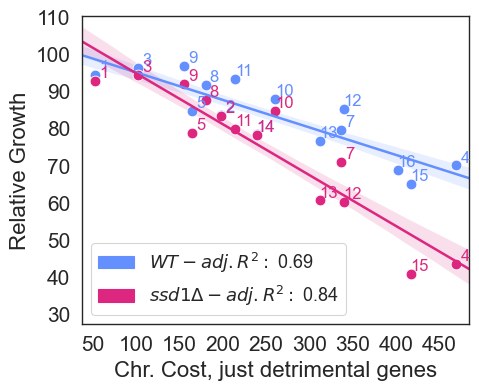

Parameters WT:  [ 1.02401314e+02 -7.41850957e-02]
R2 WT:  0.6966459871693087
Adjusted R2 WT:  0.6914157455687795
F p-value WT:  1.1756878951945922e-16
Parameters ssd1:  [108.47348002  -0.1372606 ]
R2 ssd1:  0.8466131317297367
Adjusted R2 ssd1:  0.8437726341691762
F p-value ssd1:  1.2155608599293337e-23


In [56]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m2_wt_neg, m2_ssd1_neg = Fitlin_mean2(RG_WT, RG_ssd1,  'model2-', 'MEAN RG', ['Chr. Cost, just detrimental genes','Relative Growth'])

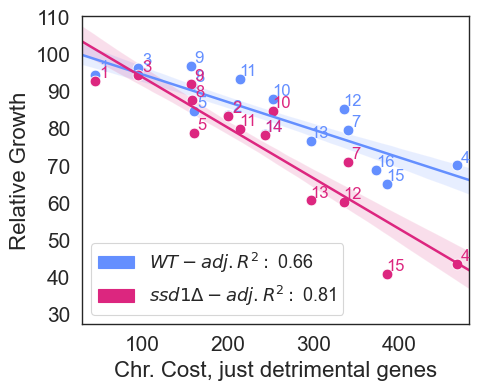

Parameters WT:  [ 1.01890605e+02 -7.45040014e-02]
R2 WT:  0.6676048699982797
Adjusted R2 WT:  0.6618739194810087
F p-value WT:  1.7003752316035062e-15
Parameters ssd1:  [107.3281472   -0.13618822]
R2 ssd1:  0.8142494256536865
Adjusted R2 ssd1:  0.8108096002028289
F p-value ssd1:  2.176287145960645e-21


In [57]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m2_wt_neg, m2_ssd1_neg = Fitlin_mean2(RG_WT, RG_ssd1,  'model2_T-', 'MEAN RG', ['Chr. Cost, just detrimental genes','Relative Growth'])

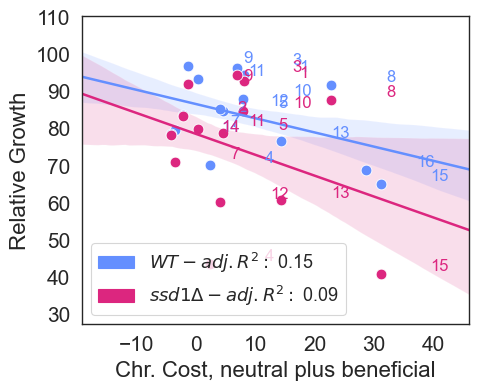

Parameters WT:  [86.43652429 -0.38198974]
R2 WT:  0.16425111770883116
Adjusted R2 WT:  0.14984165422105244
F p-value WT:  0.0013168271148842807
Parameters ssd1:  [78.38446369 -0.56195061]
R2 ssd1:  0.10624885590437361
Adjusted R2 ssd1:  0.08969790879149153
F p-value ssd1:  0.014222360691435065


In [58]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m2_wt_neg, m2_ssd1_neg = Fitlin_mean2(RG_WT, RG_ssd1,  'model2_NB-', 'MEAN RG', ['Chr. Cost, neutral plus beneficial','Relative Growth'])

In [59]:
RG_WT.columns# full model
feat =  ['model2_NB-', 'model2_T-']
m2_2WT = ols_pval(RG_WT, feat , ['MEAN RG'])
m2_2WT_llf = m2_2WT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m2_2WT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     73.29
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.75e-16
Time:                        15:09:16   Log-Likelihood:                -187.26
No. Observations:                  60   AIC:                             380.5
Df Residuals:                      57   BIC:                             386.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3135      1.583     63.373      0.0

In [60]:
# full model
feat =  ['model2_NB-', 'model2_T-']
m2_2ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])
m2_2ssd1_llf = m2_2ssd1.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m2_2ssd1_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     184.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.36e-24
Time:                        15:09:21   Log-Likelihood:                -179.97
No. Observations:                  56   AIC:                             365.9
Df Residuals:                      53   BIC:                             372.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.1799      1.827     57.584      0.0

# Nested model: model2 /model1 

In [61]:
RG_WT['model2-/nb genes'] = RG_WT['model2-'] / RG_WT['verified & uncharacterized']
RG_ssd1['model2-/nb genes'] = RG_ssd1['model2-'] / RG_ssd1['verified & uncharacterized']

In [62]:
ols_pval(RG_WT, ['verified & uncharacterized', 'model2-/nb genes'], 'MEAN RG')

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     54.34
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.21e-14
Time:                        15:09:25   Log-Likelihood:                -193.44
No. Observations:                  60   AIC:                             392.9
Df Residuals:                      57   BIC:                             399.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.5045      2.052     48.986      0.0

In [63]:
ols_pval(RG_ssd1, ['verified & uncharacterized', 'model2-/nb genes'], 'MEAN RG')

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     105.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.26e-19
Time:                        15:09:26   Log-Likelihood:                -193.06
No. Observations:                  56   AIC:                             392.1
Df Residuals:                      53   BIC:                             398.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5571      2.792     37.805      0.0

In [64]:
# full model
feat =  ['verified & uncharacterized', 'model2-/nb genes']
m3WT = ols_pval(RG_WT, feat , ['MEAN RG'])
m3WT_llf = m3WT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m3WT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     54.34
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.21e-14
Time:                        15:09:26   Log-Likelihood:                -193.44
No. Observations:                  60   AIC:                             392.9
Df Residuals:                      57   BIC:                             399.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.5045      2.052     48.986      0.0

In [65]:
# full model
feat =  ['verified & uncharacterized', 'model2-/nb genes']
m3ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])
m3ssd1_llf = m3ssd1.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m3ssd1_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     105.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.26e-19
Time:                        15:09:27   Log-Likelihood:                -193.06
No. Observations:                  56   AIC:                             392.1
Df Residuals:                      53   BIC:                             398.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5571      2.792     37.805      0.0

# Number of genes and normalized detrimental score only

In [66]:
RG_WT['model2_T/nb genes'] = RG_WT['model2_T-'] / RG_WT['Nb toxic']
RG_ssd1['model2_T/nb genes'] = RG_ssd1['model2_T-'] / RG_ssd1['Nb toxic']

In [67]:
ols_pval(RG_WT, ['verified & uncharacterized', 'model2_T/nb genes'], 'MEAN RG')

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     55.45
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           4.26e-14
Time:                        15:09:34   Log-Likelihood:                -193.05
No. Observations:                  60   AIC:                             392.1
Df Residuals:                      57   BIC:                             398.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3556      2.220     45.647      0.0

In [68]:
# full model
feat =  ['verified & uncharacterized', 'model2_T/nb genes']
m3WT = ols_pval(RG_WT, feat , ['MEAN RG'])
m3WT_llf = m3WT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m3WT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     55.45
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           4.26e-14
Time:                        15:09:35   Log-Likelihood:                -193.05
No. Observations:                  60   AIC:                             392.1
Df Residuals:                      57   BIC:                             398.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3556      2.220     45.647      0.0

In [69]:
# full model
feat =  ['verified & uncharacterized', 'model2-/nb genes']
m3ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])
m3ssd1_llf = m3ssd1.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)
    
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - m3ssd1_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     105.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.26e-19
Time:                        15:09:35   Log-Likelihood:                -193.06
No. Observations:                  56   AIC:                             392.1
Df Residuals:                      53   BIC:                             398.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5571      2.792     37.805      0.0

# Shuffle Moby score
randomly assign gene fitness to a chromosome. the number of gene per chromosome is maintened

In [70]:
RGs = RG_WT[['Chromosome', 'MEAN RG', 'verified & uncharacterized', 'model2-']]
RGs = RGs.rename(columns={"MEAN RG": "RG WT"})
RGs['RG ssd1'] = RG_ssd1['MEAN RG']

In [71]:
orf_num = list(RGs['verified & uncharacterized'])
r2s = []
for x in range(10000):
    logFC = list(genes['model2'])
    random_scores = []
    for num in orf_num:
        ind = random.sample(range(len(logFC)), num)
        select = [logFC[i] for i in ind]
        random_scores.append(sum(select))
    X = list(RGs['RG WT'])
    X = sm.add_constant(X)
    results = sm.OLS(random_scores, X).fit()
    r2s.append(results.rsquared)

In [72]:
RGs_drop16 = RGs.dropna()
orf_num = list(RGs_drop16['verified & uncharacterized'])

r2s_ssd1 = []
for x in range(10000):
    logFC = list(genes['model2'])
    random_scores = []
    for num in orf_num:
        ind = random.sample(range(len(logFC)), num)
        select = [logFC[i] for i in ind]
        #remain = [x for i,x in enumerate(logFC) if not i in ind]
        #logFC = remain
        random_scores.append(sum(select))
    X = list(RGs_drop16['RG ssd1'])
    X = sm.add_constant(X)
    results = sm.OLS(random_scores, X).fit()
    r2s_ssd1.append(results.rsquared)

Parameters:  [ 1.02401314e+02 -7.41850957e-02]
R2:  0.6966459871693087
Adjusted R2:  0.6914157455687795
F p-value:  1.1756878951945922e-16
Parameters:  [108.47348002  -0.1372606 ]
R2:  0.8466131317297367
Adjusted R2:  0.8437726341691762
F p-value:  1.2155608599293337e-23
Parameters:  [ 1.02868196e+02 -5.20096372e-02]
R2:  0.6307560820914563
Adjusted R2:  0.6243898076447573
F p-value:  3.6844149898913977e-14
Parameters:  [ 1.08459627e+02 -9.15425815e-02]
R2:  0.7650445311970104
Adjusted R2:  0.7606935039969551
F p-value:  1.2768744163565084e-18


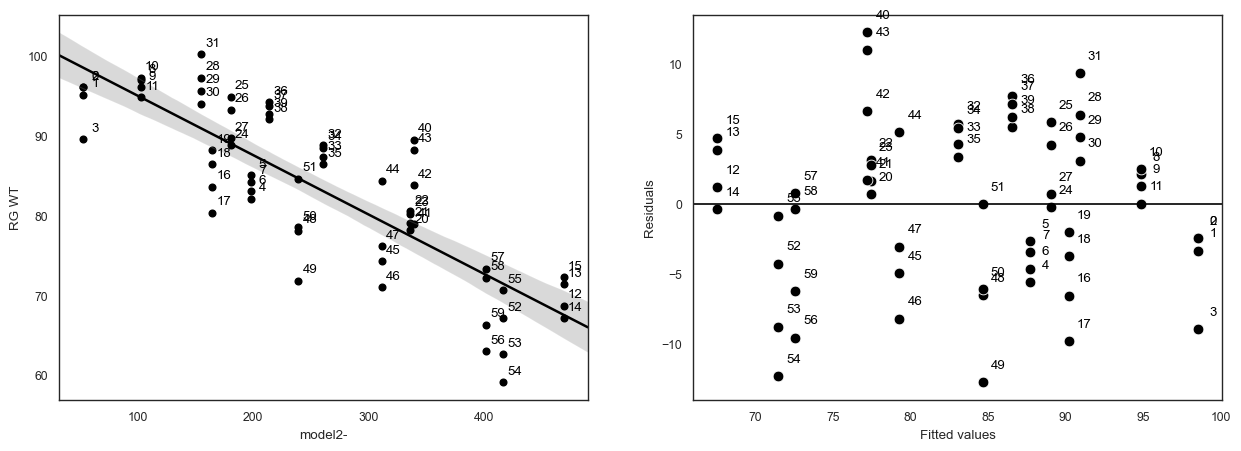

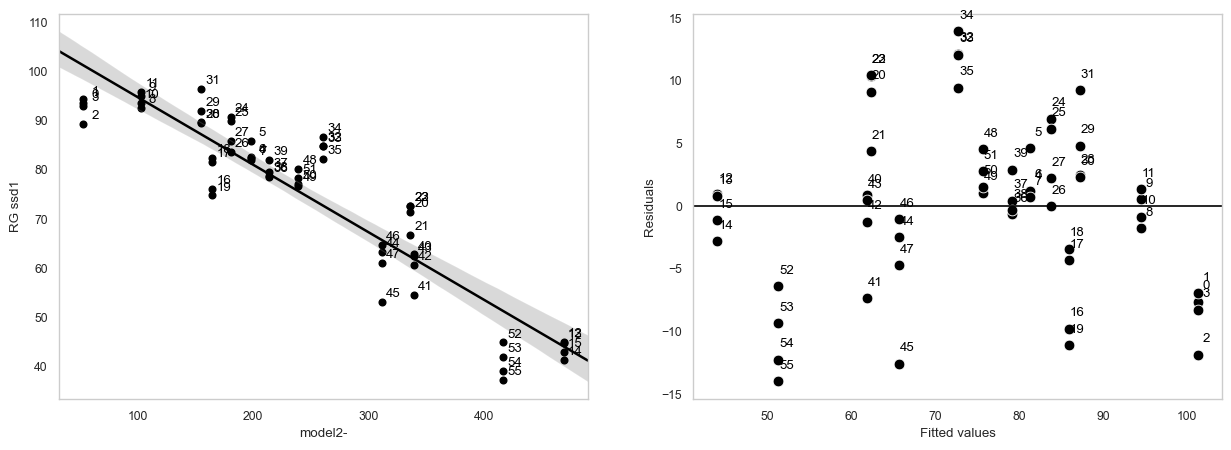

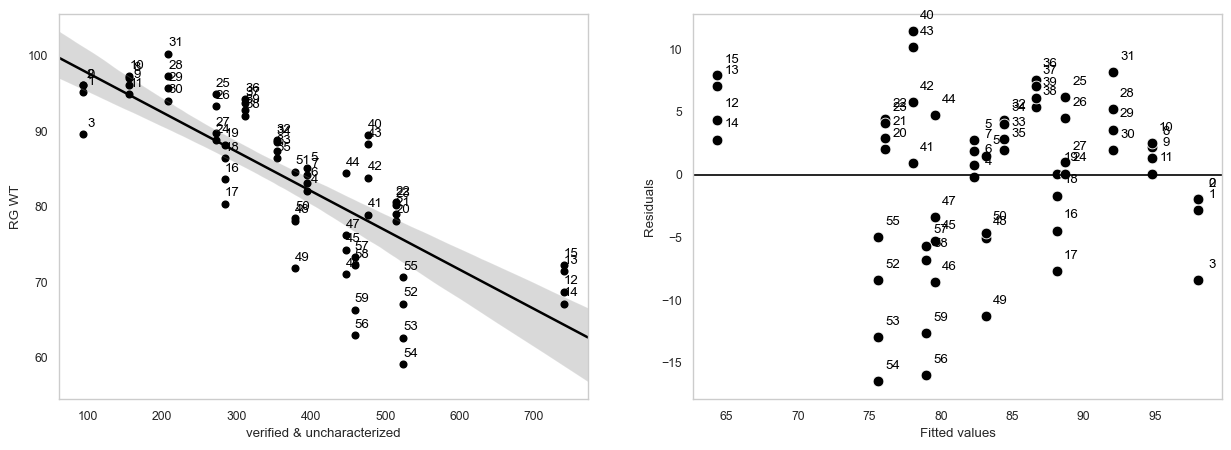

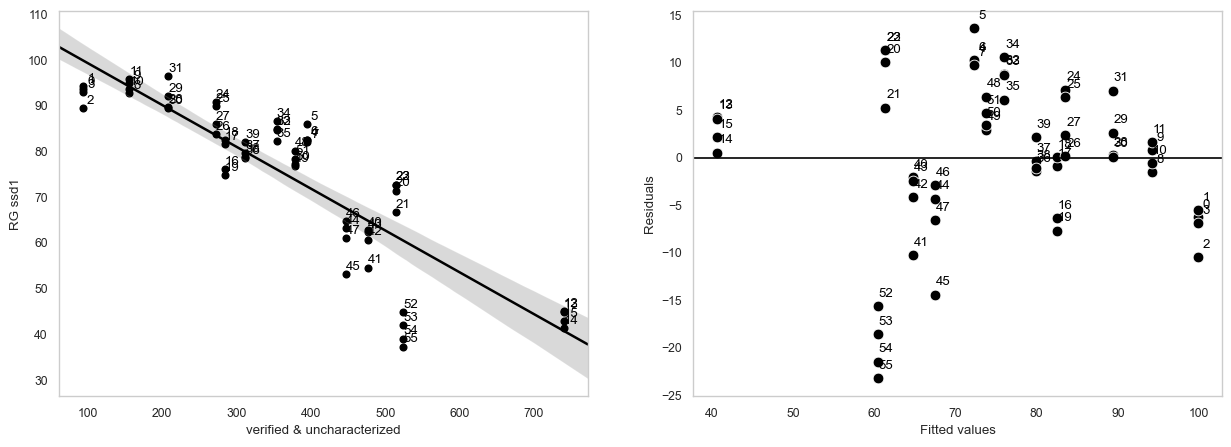

In [73]:
res_wt_moby = Fitlin(RGs, 'model2-', 'RG WT')
res_ssd1_moby = Fitlin(RGs_drop16, 'model2-', 'RG ssd1')
res_wt_orf = Fitlin(RGs, 'verified & uncharacterized', 'RG WT')
res_ssd1_orf = Fitlin(RGs_drop16, 'verified & uncharacterized', 'RG ssd1')

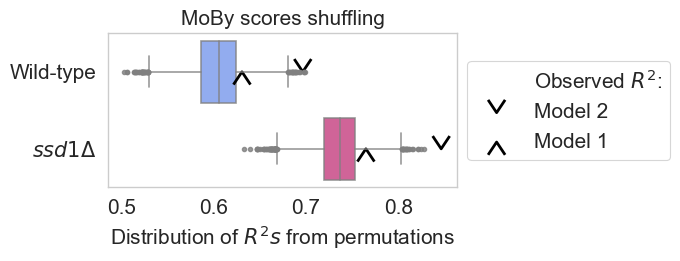

In [74]:
df_r2s = pd.DataFrame({"Wild-type": r2s,  r'$ssd1\Delta$ ': r2s_ssd1})

#sns.set(rc={'figure.figsize':(5,2)})
#sns.set_style("whitegrid")

PROPS = {
    'boxprops':{'edgecolor':'grey', 'alpha':0.8},
    'medianprops':{'color':'grey', 'alpha':0.8},
    'whiskerprops':{'color':'grey', 'alpha':0.8},
    'capprops':{'color':'grey', 'alpha':0.8},
    'flierprops': {'marker':'o', 'markerfacecolor':'grey', 'markersize':3,  'markeredgecolor':'grey', 'alpha':0.8}}

my_pal = {"Wild-type": '#648FFF',  r'$ssd1\Delta$ ': '#DC267F'}

fig, ax = plt.subplots(figsize=(4.5, 2))
ax = sns.boxplot(data=df_r2s, orient="h", **PROPS, palette = my_pal)

ax.grid(False)
ax.axes.set_title("MoBy scores shuffling",fontsize=15)
ax.set_xlabel(r"Distribution of $R^2s$ from permutations",fontsize=15)
ax.tick_params(labelsize=15)
plt.plot([], [], ' ', label=r'Observed $R^2$:')
plt.scatter( res_wt_moby.rsquared,0,  fc='none', ec='black',marker=7, s=150, linewidths=2, label='Model 2')
plt.scatter( res_wt_orf.rsquared,0, fc='none', ec='black', marker=6, s=150, linewidths=2, label = 'Model 1')

plt.scatter( res_ssd1_moby.rsquared,1, fc='none', ec='black', marker=7, s=150, linewidths=2)
plt.scatter( res_ssd1_orf.rsquared,1, fc='none', ec='black', marker=6, s=150, linewidths=2)
#ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
#ax.axvline(0, color='black')
# show plot
plt.savefig('plots/model2_melted_random_scores_distribution_to_chromosomes.svg',  bbox_inches='tight')
plt.show()

In [75]:
df_r2s[df_r2s['Wild-type'] > res_wt_orf.rsquared].shape[0] / df_r2s.shape[0]

0.1744

In [76]:
df_r2s[df_r2s['$ssd1\Delta$ '] > res_ssd1_orf.rsquared].shape[0] / df_r2s.shape[0]

0.1209

In [77]:
df_r2s.columns

Index(['Wild-type', '$ssd1\Delta$ '], dtype='object')

In [78]:
len(df_r2s[df_r2s['Wild-type'] >= res_wt_moby.rsquared])/100

0.03

### Save the computed Chr. cost

In [79]:
RG_WT.to_csv('result_datasets/230601_RG_WT_model1_2_melted.csv')
RG_ssd1.to_csv('result_datasets/230601_RG_ssd1_model1_2_melted.csv')

In [80]:
test_WT.to_csv('result_datasets/230601_RG_TEST_WT_model1_2_melted.csv')
test_ssd1.to_csv('result_datasets/230601_RG_TEST_ssd1_model1_2_melted.csv')

# Multi-linear Model:
### Load yps1009 coding and non-coding feautre counts for each chomosomes, normalized to the total number of feature per chromosome

In [81]:
normFeat = pd.read_csv('datasets/yps1009_features_normTotFeat.csv', index_col=0)

In [82]:
normFeat['Chromosome'] = list(normFeat.index)

In [83]:
# prepare the dataset
RG_WT = RG_WT[['Chromosome', 'MEAN RG', 'model2', 'model2-', 'model2_2',
       'model2_2-', 'model2_neg', 'model2_neg-', 'model2_pos', 'model2_pos-']]

RG_ssd1 = RG_ssd1[['Chromosome', 'MEAN RG', 'model2', 'model2-', 'model2_2',
       'model2_2-', 'model2_neg', 'model2_neg-', 'model2_pos', 'model2_pos-']]

In [84]:
normFeat.drop('Chromosome', axis=1, inplace=True)

In [85]:
RG_WT = pd.merge(RG_WT, normFeat , on="Chromosome")
RG_ssd1 = pd.merge(RG_ssd1, normFeat , on="Chromosome")

In [86]:
meanRG_WT = RG_WT.groupby('Chromosome', as_index=False).mean()

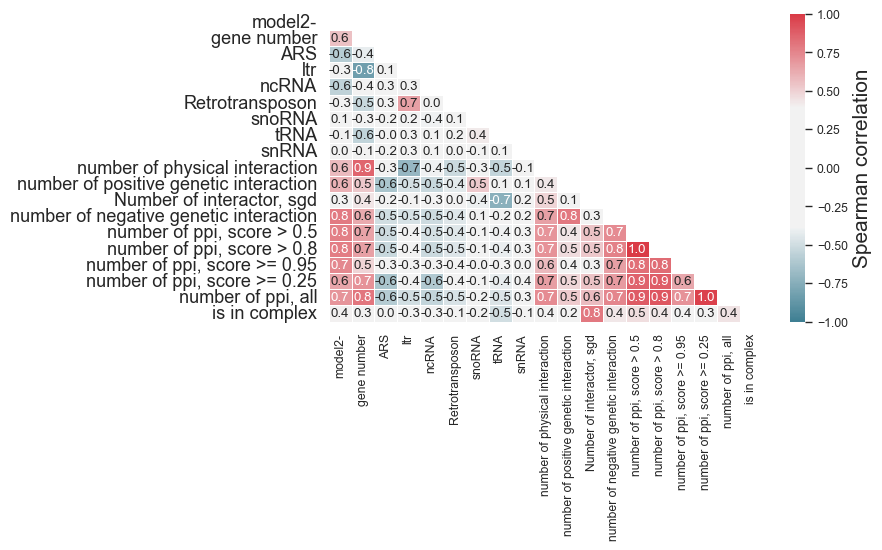

In [87]:
# Features correlation
tmp = meanRG_WT[['model2-', 'gene number', 'ARS', 'ltr', 'ncRNA',
       'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA',  'number of physical interaction',
       'number of positive genetic interaction', 'Number of interactor, sgd',
       'number of negative genetic interaction', 'number of ppi, score > 0.5',
       'number of ppi, score > 0.8', 'number of ppi, score >= 0.95',
       'number of ppi, score >= 0.25', 'number of ppi, all', 'is in complex']]
corr = tmp.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(7, 4))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, annot=True, cbar_kws={'label': 'Spearman correlation'}, fmt=".1f")
ax.figure.axes[-1].yaxis.label.set_size(15)
plt.yticks(rotation=0, fontsize = 13) 
#plt.xticks(rotation=90) 
plt.show()

In [88]:
#RG_WT = RG_WT[['Chromosome', 'MEAN RG',  'model2-',  'ARS','ltr', 'ncRNA', 'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
RG_WT = RG_WT.rename(columns={'model2-': 'Model 2: Chr. cost', 'ltr': 'LTR'})

#RG_ssd1 = RG_ssd1[['Chromosome', 'MEAN RG', 'model2-', 'ARS','ltr', 'ncRNA', 'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
RG_ssd1 = RG_ssd1.rename(columns={'model2-': 'Model 2: Chr. cost', 'ltr': 'LTR'})

In [89]:
test_WT = test_WT[['Chromosome', 'MEAN RG',  'model2-', 'ARS','ltr', 'ncRNA', 'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
test_WT = test_WT.rename(columns={'model2-': 'Model 2: Chr. cost', 'ltr': 'LTR'})

test_ssd1 = test_ssd1[['Chromosome', 'MEAN RG', 'model2-', 'ARS','ltr', 'ncRNA', 'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
test_ssd1 = test_ssd1.rename(columns={'model2-': 'Model 2: Chr. cost', 'ltr': 'LTR'})

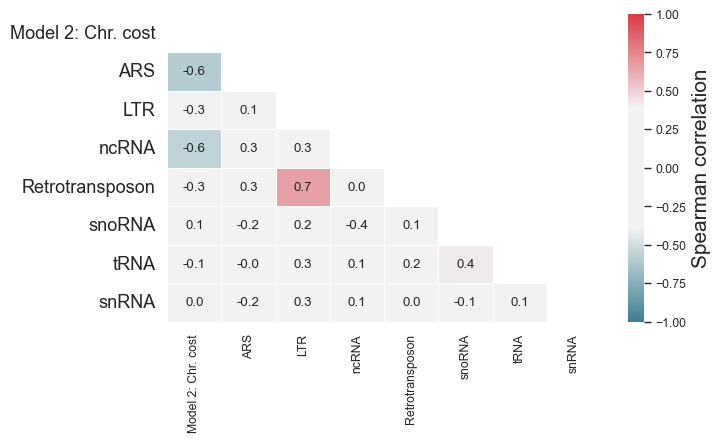

meta NOT subset; don't know how to subset; dropped


In [90]:
tmp = RG_WT[['Model 2: Chr. cost', 'ARS', 'LTR', 'ncRNA',
       'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']]
corr = tmp.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(7, 4))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, annot=True, cbar_kws={'label': 'Spearman correlation'}, fmt=".1f")
ax.figure.axes[-1].yaxis.label.set_size(15)
plt.yticks(rotation=0, fontsize = 13) 
#plt.xticks(rotation=90) 
plt.show()
#fig.suptitle('Correlation matrix of features', fontsize=10)
fig.tight_layout()
fig.savefig('plots/non_coding_spearman_corr.pdf', bbox_inches='tight')

## Bolasso: Bootstrap + Lasso

In [91]:
def lasso2(RG, features, yf, alpha = 0.5):
    X = RG[features]
    y = RG[yf]
    # standardization of dependent variables (sklearn)
    X_s = preprocessing.scale(X)
    # Lasso (also regularized)
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_s, y)

    #print('R2 score: ', round(lasso_reg.score(X_s,y),3))
    #print('Intercept: ', round(lasso_reg.intercept_[0],3))
    n_v = 0
    for x in range(len(X.columns)):
    #    print(X.columns[x], round(lasso_reg.coef_[x], 3))
        if lasso_reg.coef_[x] > 0:
            n_v +=1
    adjr2 = round((1-((1-lasso_reg.score(X_s,y))*(X.shape[0]-1))/(X.shape[0]-1 -n_v)) ,3)
    return lasso_reg, adjr2

In [92]:
# For reproducibility
np.random.seed(42)

size = 4        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

coefs_WT = []
r2_WT = []
coefs_ssd1 = []
r2_ssd1 = []
X = ['Model 2: Chr. cost', 'ARS', 'LTR', 'ncRNA',
       'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA',
       'gene number']
for x in range(1000):
    WT= resample(RG_WT)
    ssd1= resample(RG_ssd1)
    ssd1.dropna(inplace=True)
    
    regr, r2 = lasso2(WT, X, ['MEAN RG'], alpha = 0.7)
    coefs_WT.append(regr.coef_)
    r2_WT.append(r2)
    
    regr, r2 = lasso2(ssd1, X, ['MEAN RG'], alpha = 0.7)
    coefs_ssd1.append(regr.coef_)
    r2_ssd1.append(r2)
    
coefs_WT_pd = pd.DataFrame(coefs_WT,columns=X)
coefs_ssd1_pd = pd.DataFrame(coefs_ssd1,columns=X)

coefs_WT_pd['strains'] = ['WT' for x in range(coefs_WT_pd.shape[0])]
coefs_ssd1_pd['strains'] = ['ssd1' for x in range(coefs_ssd1_pd.shape[0])]
DF = pd.concat([coefs_WT_pd, coefs_ssd1_pd])
DFmelt = pd.melt(DF, value_vars= X , id_vars='strains')

In [93]:
DF_WT = DFmelt[DFmelt['strains'] == 'WT']
wt = DF_WT[DF_WT['value'] != 0]
feat_wt = wt['variable'].value_counts().to_frame()
wt['variable'].value_counts()

variable
Model 2: Chr. cost    1000
tRNA                   999
snoRNA                 909
snRNA                  822
Retrotransposon        463
ncRNA                  315
ARS                    290
LTR                    126
gene number              4
Name: count, dtype: int64

In [94]:
DF_ssd1 = DFmelt[DFmelt['strains'] == 'ssd1']
ssd1 = DF_ssd1[DF_ssd1['value'] != 0]
feat_ssd1 = ssd1['variable'].value_counts().to_frame()
ssd1['variable'].value_counts()

variable
Model 2: Chr. cost    1000
snoRNA                 999
tRNA                   997
Retrotransposon        994
ncRNA                  404
snRNA                  238
LTR                     79
ARS                     60
gene number              1
Name: count, dtype: int64

In [95]:
# For reproducibility
np.random.seed(42)

size = 4        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

coefs_WT = []
r2_WT = []
coefs_ssd1 = []
r2_ssd1 = []
X = ['Model 2: Chr. cost', 'ARS', 'LTR', 'ncRNA',
       'Retrotransposon', 'snoRNA', 'tRNA', 'snRNA']
for x in range(1000):
    WT = resample(RG_WT)
    ssd1 = resample(RG_ssd1)
    ssd1.dropna(inplace=True)
    
    regr, r2 = lasso2(WT, X, ['MEAN RG'], alpha = 0.7)
    coefs_WT.append(regr.coef_)
    r2_WT.append(r2)
    
    regr, r2 = lasso2(ssd1, X, ['MEAN RG'], alpha = 0.7)
    coefs_ssd1.append(regr.coef_)
    r2_ssd1.append(r2)
    
coefs_WT_pd = pd.DataFrame(coefs_WT,columns=X)
coefs_ssd1_pd = pd.DataFrame(coefs_ssd1,columns=X)

coefs_WT_pd['strains'] = ['WT' for x in range(coefs_WT_pd.shape[0])]
coefs_ssd1_pd['strains'] = ['ssd1' for x in range(coefs_ssd1_pd.shape[0])]
DF = pd.concat([coefs_WT_pd, coefs_ssd1_pd])
DFmelt = pd.melt(DF, value_vars= X , id_vars='strains')

In [96]:
DF_WT = DFmelt[DFmelt['strains'] == 'WT']
wt = DF_WT[DF_WT['value'] != 0]
feat_wt = wt['variable'].value_counts().to_frame()

In [97]:
DF_ssd1 = DFmelt[DFmelt['strains'] == 'ssd1']
ssd1 = DF_ssd1[DF_ssd1['value'] != 0]
feat_ssd1 = ssd1['variable'].value_counts().to_frame()

In [98]:
feat_wt = list(feat_wt[feat_wt['count'] >= 900].index)
feat_ssd1 = list(feat_ssd1[feat_ssd1['count'] >= 900].index)

DF_WT = DF_WT[DF_WT.variable.isin(feat_wt)]
DF_ssd1= DF_ssd1[DF_ssd1.variable.isin(feat_ssd1)]

# Model 3: multi-linear model using Bolasso

meta NOT subset; don't know how to subset; dropped


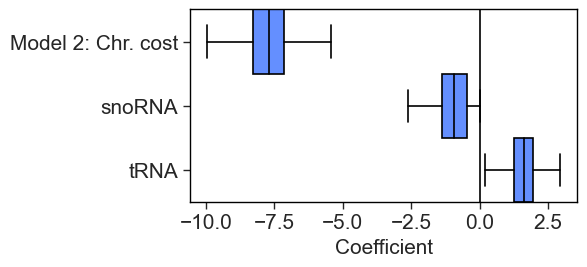

In [99]:
sns.set(rc={'figure.figsize': (5, 2.5)})

sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 1)
sns.set_style('ticks', {'axes.edgecolor': '0'})
PROPS = {
    'boxprops':{'facecolor':'#648FFF', 'edgecolor':'black'}}
    
ax = sns.boxplot(y='variable', x='value', orient='h', 
                 data=DF_WT, **PROPS,
                 width=1, showfliers = False)
ax.grid(False)
ax.set_xlabel("Coefficient", fontsize=15)
ax.set(ylabel=None)
ax.tick_params(labelsize=15)
ax.axvline(0, color='black')
plt.setp(ax.artists, edgecolor='black')
plt.setp(ax.lines, color='black')
#plt.style.use('_mpl-gallery')
plt.savefig('plots/multiWT_coeffs_bootstrap.pdf', bbox_inches='tight')
plt.show()

In [100]:
# Model3: full model
feat = ['Model 2: Chr. cost', 'snoRNA', 'tRNA']
m4WT = ols_pval(RG_WT, feat , ['MEAN RG'])

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     56.89
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           5.25e-17
Time:                        15:16:20   Log-Likelihood:                -183.51
No. Observations:                  60   AIC:                             375.0
Df Residuals:                      56   BIC:                             383.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.8494      1.784     54.303      0.0

meta NOT subset; don't know how to subset; dropped


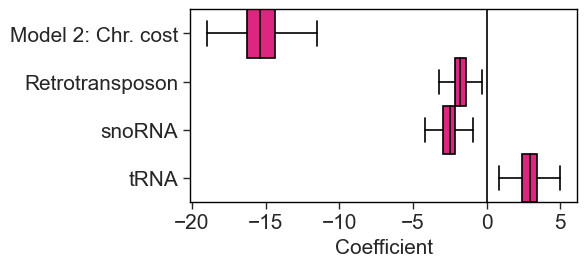

In [101]:
sns.set(rc={'figure.figsize': (5, 2.5)})

sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 1)
sns.set_style('ticks', {'axes.edgecolor': '0'})
PROPS = {
    'boxprops':{'facecolor':'#DC267F', 'edgecolor':'black'}}
    
ax = sns.boxplot(y='variable', x='value', orient='h', 
                 data=DF_ssd1, **PROPS,
                 width=1, showfliers = False)
ax.grid(False)
ax.set_xlabel("Coefficient", fontsize=15)
ax.set(ylabel=None)
ax.tick_params(labelsize=15)
ax.axvline(0, color='black')
plt.setp(ax.artists, edgecolor='black')
plt.setp(ax.lines, color='black')
#plt.style.use('_mpl-gallery')
plt.savefig('plots/multissd1_coeffs_bootstrap.pdf', bbox_inches='tight')
plt.show()

In [102]:
# full model
feat = ['Model 2: Chr. cost', 'snoRNA', 'tRNA', 'Retrotransposon']
m4ssd1 = ols_pval(RG_ssd1, feat , ['MEAN RG'])

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     208.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.53e-31
Time:                        15:16:21   Log-Likelihood:                -158.18
No. Observations:                  56   AIC:                             326.4
Df Residuals:                      51   BIC:                             336.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5576      1.873     56.364      0.0

# Nested model, Chi-square test

In [103]:
# full model
feat = ['Model 2: Chr. cost', 'snoRNA', 'tRNA']
mtWT = ols_pval(RG_WT, feat , ['MEAN RG'])
mtWT_llf = mtWT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_WT, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     56.89
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           5.25e-17
Time:                        15:16:21   Log-Likelihood:                -183.51
No. Observations:                  60   AIC:                             375.0
Df Residuals:                      56   BIC:                             383.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.8494      1.784     54.303      0.0

In [104]:
f = []
p = []
s = []
for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - mtWT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    f.append(feat[x])
    p.append(p_val)
    s.append(LR_statistic)
    print('p-value: ', '{:0.3e}'.format(p_val))

nested_WT = pd.DataFrame({'features': f, 'likelihood ratio statistic': s, 'p-value': p})

Model 2: Chr. cost LR statistic: 74.06
p-value:  7.573e-18
snoRNA LR statistic: 5.45
p-value:  1.956e-02
tRNA LR statistic: 10.55
p-value:  1.165e-03


In [105]:
nested_WT

,features,likelihood ratio statistic,p-value
0,Model 2: Chr. cost,74.061335,7.572717e-18
1,snoRNA,5.450952,1.955767e-02
2,tRNA,10.545677,1.164601e-03


In [106]:
nested_WT.to_csv('plots/model3_WT_nested_model_pval.csv', index=False)

In [107]:
nested_WT['p-value'][0]

7.572717006833772e-18

meta NOT subset; don't know how to subset; dropped


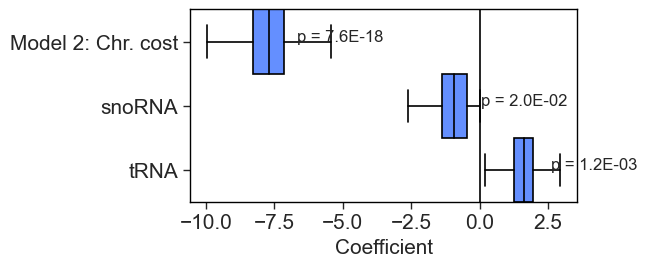

In [108]:
sns.set(rc={'figure.figsize': (5, 2.5)})

sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 1)
sns.set_style('ticks', {'axes.edgecolor': '0'})
PROPS = {
    'boxprops':{'facecolor':'#648FFF', 'edgecolor':'black'}}
    
ax = sns.boxplot(y='variable', x='value', orient='h', 
                 data=DF_WT, **PROPS,
                 width=1, showfliers = False)
ax.grid(False)
ax.set_xlabel("Coefficient", fontsize=15)
ax.set(ylabel=None)
ax.tick_params(labelsize=15)
ax.axvline(0, color='black')
plt.setp(ax.artists, edgecolor='black')
plt.setp(ax.lines, color='black')

for x in range(nested_WT.shape[0]): 
    ax.text(DF_WT[DF_WT['variable'] == nested_WT['features'][x]].value.mean() + 1, x , 'p = ' + str('%.1E' % Decimal(nested_WT['p-value'][x])), fontsize=12)
        
plt.savefig('plots/multiWT_coeffs_bootstrap_pvalue.pdf', bbox_inches='tight')
plt.show()

In [109]:
# full model ssd1
feat = ['Model 2: Chr. cost', 'snoRNA', 'tRNA', 'Retrotransposon']
mtWT = ols_pval(RG_ssd1, feat , ['MEAN RG'])
mtWT_llf = mtWT.llf
# Nested models
nested_llf = []
for x in range(len(feat)):
    tmp = feat.copy()
    f = tmp.pop(x)
    m = ols_pval(RG_ssd1, tmp, ['MEAN RG'])
    nested_llf.append(m.llf)

                            OLS Regression Results                            
Dep. Variable:                MEAN RG   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     208.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.53e-31
Time:                        15:16:41   Log-Likelihood:                -158.18
No. Observations:                  56   AIC:                             326.4
Df Residuals:                      51   BIC:                             336.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5576      1.873     56.364      0.0

In [110]:
f = []
p = []
s = []

for x in range(len(nested_llf)):
    #calculate likelihood ratio Chi-Squared test statistic
    LR_statistic = -2*(nested_llf[x] - mtWT_llf)
    print(feat[x] + ' LR statistic: ' + str(round(LR_statistic, 2)))
    #calculate p-value of test statistic using 2 degrees of freedom
    p_val = stats.chi2.sf(LR_statistic, 1)
    print('p-value: ', '{:0.3e}'.format(p_val))
    f.append(feat[x])
    p.append(p_val)
    s.append(LR_statistic)
    
nested_ssd1 = pd.DataFrame({'features': f, 'likelihood ratio statistic': s, 'p-value': p})

Model 2: Chr. cost LR statistic: 144.17
p-value:  3.261e-33
snoRNA LR statistic: 27.07
p-value:  1.965e-07
tRNA LR statistic: 34.55
p-value:  4.159e-09
Retrotransposon LR statistic: 22.37
p-value:  2.243e-06


In [111]:
nested_ssd1.to_csv('plots/model3_ssd1_nested_model_pval.csv', index=False)

Model 2: Chr. cost
Retrotransposon
snoRNA
tRNA


meta NOT subset; don't know how to subset; dropped


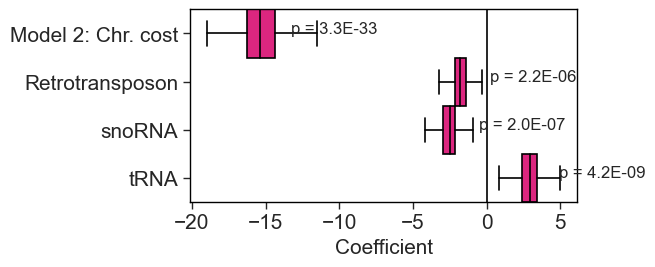

In [112]:
sns.set(rc={'figure.figsize': (5, 2.5)})

sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 1)
sns.set_style('ticks', {'axes.edgecolor': '0'})
PROPS = {
    'boxprops':{'facecolor':'#DC267F', 'edgecolor':'black'}} 
    
ax = sns.boxplot(y='variable', x='value', orient='h', 
                 data=DF_ssd1, **PROPS,
                 width=1, showfliers = False)
ax.grid(False)
ax.set_xlabel("Coefficient", fontsize=15)
ax.set(ylabel=None)
ax.tick_params(labelsize=15)
ax.axvline(0, color='black')
plt.setp(ax.artists, edgecolor='black')
plt.setp(ax.lines, color='black')
#plt.style.use('_mpl-gallery')
f = ['Model 2: Chr. cost','Retrotransposon', 'snoRNA', 'tRNA' ]
for x in range(nested_ssd1.shape[0]): 
    print(f[x])
    ax.text(DF_ssd1[DF_ssd1['variable'] == f[x]].value.mean() + 2, x , 'p = ' + str('%.1E' % Decimal(float(nested_ssd1[nested_ssd1.features == f[x]]['p-value']))), fontsize=12)
plt.savefig('plots/multissd1_coeffs_bootstrap_pval.pdf', bbox_inches='tight')
plt.show()

In [113]:
def Fitlin_multi_mean(RG1, cx1, cy, ax_l, label = r'$wild-type - adj. R^2 : $ ', color = '#648FFF', filenamesvg=None, labels=True,  alpha=1):
    X1 = RG1[cx1]
    y1 = list(RG1[cy])
    
    X1 = preprocessing.scale(X1)
    X1 = sm.add_constant(X1)
    results1 = sm.OLS(y1, X1).fit()
    y_pred1 = results1.predict(X1)
    RG1['prediction'] = y_pred1
    
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)


    #colors = ['#648FFF', '#DC267F']
    #sns.set(rc={'figure.figsize':(4.5,3.5)})
    #sns.set_style("white")


    f, ax = plt.subplots()
    ax.set(xlim=(min((y_pred1))-5, max((y_pred1))+5), ylim=(min(y1)-5, max(y1)+5))
    sns.regplot(x='prediction', y=cy, data=RG1, ax=ax, truncate=False, scatter=False,
                color=color)

    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x='prediction', y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=color, legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1['prediction'])
    n1 = list(mean1['Chromosome'])
    
    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    patch1 = mpatches.Patch(color=color, label= label  +  str(round(results1.rsquared_adj, 2)))

    plt.legend(handles=[patch1], fontsize= 13,  loc='lower right')
    
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + ((max(y_pred1)/100)), y_m1[i] + (max(y1)/100), n1[i], horizontalalignment='center', color=color, weight='light', fontsize= 12)
    
    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
        
    plt.show()

    return results1

In [114]:
def Fitlin_multi_test(RG1, test1, cx, cy, ax_l, colors = ['#648FFF', '#FE6100'], filenamesvg=None, labels=True,  alpha=1):
    X1 = RG1[cx]
    y1 = list(RG1[cy])
    
    Xt1 = test1[cx]
    yt1 = list(test1[cy])
    
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(X1)
    
    X1 = scaler.transform(X1)
    X1 = sm.add_constant(X1)
    
    Xt1 = scaler.transform(Xt1)
    Xt1 = sm.add_constant(Xt1)
    
    results1 = sm.OLS(y1, X1).fit()
    y_pred1 = results1.predict(X1)
    RG1['prediction'] = y_pred1
    
    print('Parameters WT: ', results1.params)
    print('R2 WT: ', results1.rsquared)
    print('Adjusted R2 WT: ', results1.rsquared_adj)
    print('F p-value WT: ', results1.f_pvalue)
    
    yt_pred1 = results1.predict(Xt1)
    test1['prediction'] = yt_pred1
    yt_p_np1 = np.array(yt_pred1)
    yt_np1 = np.array(yt1)
    
    print()
    print('R2 score of test set: ', r2_score(yt_np1, yt_p_np1))
    print('Adjusted R2 of test set: ',round((1-((1-r2_score(yt_np1, yt_p_np1))*(len(Xt1)-1))/(len(Xt1)-1 -1)) ,3))

    yt_p_np1 = np.array(yt_pred1)
    yt_np1 = np.array(yt1)
    
    #sns.set(rc={'figure.figsize':(4.5,3.5)})
    #sns.set_style("white")
    #sns.set_style('white', rc={
    #'xtick.bottom': True,
    #'ytick.left': True,
    #})          

    sns.set_style('ticks')
    
    # regression of train set
    f, ax = plt.subplots()
    ax.set(xlim=(min((y_pred1))-5, max((y_pred1))+5), ylim=(min(y1)-5, max(y1)+5))
    sns.regplot(x='prediction', y=cy, data=RG1, ax=ax, truncate=False, scatter=False,
                color=colors[0])
    
    # plotting train set mean points
    mean1 = RG1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x='prediction', y=cy, data=mean1, ax=ax, s=60, alpha=alpha, color=colors[0], legend=False)
    
    y_m1 = list(mean1[cy])
    x_m1 = list(mean1['prediction'])
    n1 = list(mean1['Chromosome'])

    # Plotting the test set
    test_mean1 = test1.groupby('Chromosome', as_index=False).mean()
    sns.scatterplot(x='prediction', y=cy, data= test_mean1, ax=ax, s=60, alpha=alpha, color=colors[1], legend=False)
    
    yt_m1 = list(test_mean1[cy])
    xt_m1 = list(test_mean1['prediction'])
    nt1 = list(test_mean1['Chromosome'])
    
    if labels:
        for i in range(len(n1)):
            ax.text(x_m1[i] + ((max(y_pred1)/100)), y_m1[i] + (max(y1)/100), n1[i], horizontalalignment='center', color=colors[0], weight='light', fontsize= 12)
        
        for i in range(len(nt1)):
            ax.text(xt_m1[i] + ((max(yt_pred1)/100)), yt_m1[i] + (max(yt1)/100), nt1[i], horizontalalignment='center', color=colors[1], weight='light', fontsize= 12)
    
    patch1 = mpatches.Patch(color=colors[0], label= r'Train set - $adj. R^2 : $ '  +  str(round(results1.rsquared_adj, 2)))
    patch2 = mpatches.Patch(color=colors[1], label= r'Test set - $adj. R^2 : $ ' +  str(round((1-((1-r2_score(yt_np1, yt_p_np1))*(len(Xt1)-1))/(len(Xt1)-1 -1)) ,2)))

    plt.legend(handles=[patch1, patch2], fontsize= 12,  loc='lower right')
    plt.xlabel(ax_l[0], fontsize=16)
    plt.ylabel(ax_l[1], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()    

    if filenamesvg != None:
        f.savefig(filenamesvg, bbox_inches='tight')
        
    plt.show()
    
    # GQ test
    threshold_p_value = 0.05
    resids = y_pred1 - y1

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, results1.model.exog)[:-1],
                       columns=['value'],
                       index=['F statistic', 'p-value'])

    print('\n Goldfeld-Quandt test (homoscedasticity) ----')
    print(gq_test)

    # Check if p-value is below the threshold
    if gq_test.loc['p-value', 'value'] < threshold_p_value:
        print("Homoscedasticity test: Does not pass (heteroscedasticity is present)")
    else:
        print("Homoscedasticity test: Passes (homoscedasticity is assumed)")

    return results1

Parameters WT:  [ 96.8493568  -29.27867639  -6.09158643   7.4502823 ]
R2 WT:  0.7529506884500561
Adjusted R2 WT:  0.7397159039027377
F p-value WT:  5.254656697167508e-17

R2 score of test set:  0.7284036597833653
Adjusted R2 of test set:  0.701


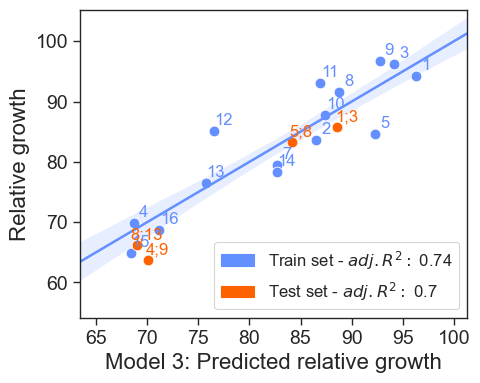

meta NOT subset; don't know how to subset; dropped



 Goldfeld-Quandt test (homoscedasticity) ----
                value
F statistic  2.133438
p-value      0.029285
Homoscedasticity test: Does not pass (heteroscedasticity is present)


In [115]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
resWT = Fitlin_multi_test(RG_WT, test_WT, ['Model 2: Chr. cost', 'snoRNA', 'tRNA'] , 'MEAN RG', ['Model 3: Predicted relative growth', 'Relative growth'], filenamesvg='plots/model3_test.pdf')

Parameters WT:  [83.39925504 -8.19130782 -1.67210906  2.37587778]
R2 WT:  0.7529506884500562
Adjusted R2 WT:  0.7397159039027378
F p-value WT:  5.254656697167459e-17


meta NOT subset; don't know how to subset; dropped


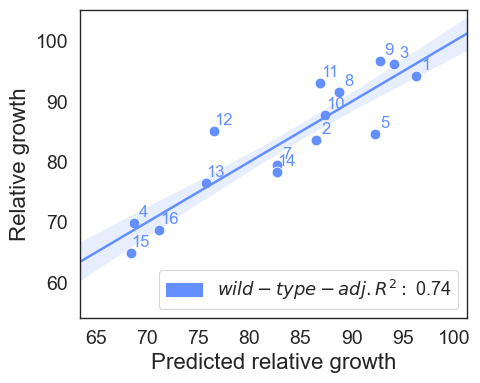

In [116]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_WT = Fitlin_multi_mean(RG_WT, ['Model 2: Chr. cost', 'snoRNA', 'tRNA'] , 'MEAN RG', ['Predicted relative growth', 'Relative growth'], color = '#648FFF', filenamesvg='plots/multiLin_WT.pdf')

In [117]:
X = RG_WT[['Model 2: Chr. cost', 'snoRNA', 'tRNA']]
y = list(RG_WT['MEAN RG'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = sm.add_constant(X)

y_pred = m3_WT.predict(X)
resids = y_pred - y

residual_df = pd.DataFrame({'Chromosome': RG_WT['Chromosome'], 'm3': resids})
res_mean_df = residual_df.groupby('Chromosome', as_index=False).mean()
res_mean_df = res_mean_df.rename(columns={'m3': 'm3 mean'})
res_std_df = residual_df.groupby('Chromosome', as_index=False).std()
res_std_df = res_std_df.rename(columns={'m3': 'm3 std'})
del res_std_df['Chromosome']
res_mean_df = res_mean_df.join(res_std_df)

Parameters WT:  [83.39925504 -8.53906391 -0.98095882]
R2 WT:  0.7054793128817071
Adjusted R2 WT:  0.6951452536845739
F p-value WT:  7.409696897156735e-16


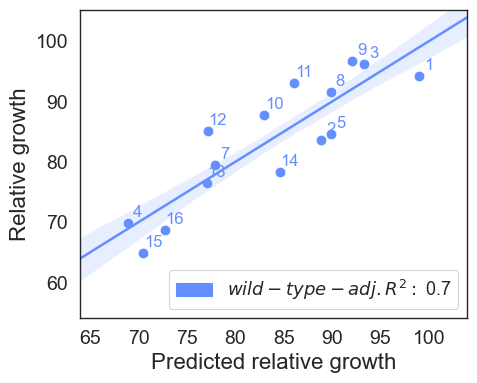

In [118]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_WT_notRNA = Fitlin_multi_mean(RG_WT, ['Model 2: Chr. cost', 'snoRNA',] , 'MEAN RG', ['Predicted relative growth', 'Relative growth'], color = '#648FFF')

In [119]:
X = RG_WT[['Model 2: Chr. cost', 'snoRNA']]
y = list(RG_WT['MEAN RG'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = sm.add_constant(X)

y_pred = m3_WT_notRNA.predict(X)
resids = y_pred - y

residual_df = pd.DataFrame({'Chromosome': RG_WT['Chromosome'], 'm3-tRNA': resids})
tmp = residual_df.groupby('Chromosome', as_index=False).mean()
tmp = tmp.rename(columns={'m3-tNRA': 'm3-tRNA mean'})
tmp_std = residual_df.groupby('Chromosome', as_index=False).std()
tmp_std = tmp_std.rename(columns={'m3-tRNA': 'm3-TRNA std'})
del tmp_std['Chromosome']
tmp = tmp.join(tmp_std)
del tmp['Chromosome']
res_mean_df = res_mean_df.join(tmp)

In [120]:
res_mean_df['m3 - m3-tRNA mean'] = np.abs(np.abs(res_mean_df['m3 mean']) -np.abs(res_mean_df['m3-tRNA']))

In [121]:
res_mean_df.sort_values('m3 - m3-tRNA mean')

,Chromosome,m3 mean,m3 std,m3-tRNA,m3-TRNA std,m3 - m3-tRNA mean
0,1,-10.920332,3.122608,-10.956710,3.122608,0.036378
1,2,-3.090424,1.294305,-3.200948,1.294305,0.110524
13,15,10.609891,5.044681,10.381735,5.044681,0.228156
12,14,1.199726,5.204089,0.936214,5.204089,0.263512
14,16,7.547418,4.897183,7.176011,4.897183,0.371407
6,8,-10.443300,2.880148,-10.967180,2.880148,0.523881
11,13,1.163479,5.674153,0.625686,5.674153,0.537793
10,12,-7.317321,4.775056,-7.980627,4.775056,0.663305
3,4,5.655526,2.374512,4.915128,2.374512,0.740398
7,9,-14.412346,2.655826,-15.476203,2.655826,1.063857


Parameters WT:  [ 74.7458023  -16.76163274  -3.38555892   3.93652864  -3.34267351]
R2 WT:  0.9422654498715969
Adjusted R2 WT:  0.9377372498615261
F p-value WT:  6.531827144510443e-31


meta NOT subset; don't know how to subset; dropped


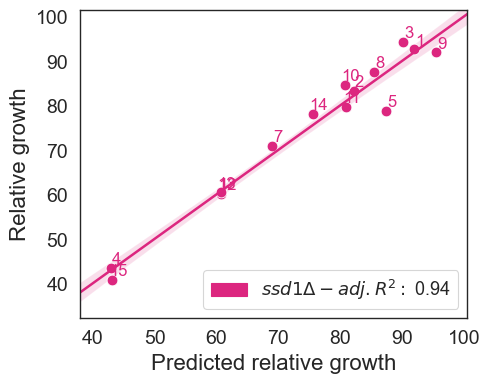

In [122]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_ssd1 = Fitlin_multi_mean(RG_ssd1, ['Model 2: Chr. cost', 'snoRNA', 'tRNA', 'Retrotransposon'] , 'MEAN RG',  ['Predicted relative growth', 'Relative growth'], label = r'$ssd1\Delta - adj. R^2 : $ ', color = '#DC267F', filenamesvg='plots/multiLin_ssd1.pdf')

## Test effect of tRNA

In [123]:
X = RG_ssd1[['Model 2: Chr. cost', 'snoRNA', 'tRNA', 'Retrotransposon']]
y = list(RG_ssd1['MEAN RG'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = sm.add_constant(X)

y_pred = m3_ssd1.predict(X)
resids = y_pred - y

residual_df_S = pd.DataFrame({'Chromosome': RG_ssd1['Chromosome'], 'm3': resids})
res_mean_df_S = residual_df_S.groupby('Chromosome', as_index=False).mean()
res_mean_df_S = res_mean_df_S.rename(columns={'m3': 'm3 mean'})
res_std_df_S = residual_df_S.groupby('Chromosome', as_index=False).std()
res_std_df_S = res_std_df_S.rename(columns={'m3': 'm3 std'})
del res_std_df_S['Chromosome']
res_mean_df_S = res_mean_df_S.join(res_std_df_S)

Parameters WT:  [ 74.7458023  -17.02760764  -2.24986155  -3.27343936]
R2 WT:  0.8930047295267393
Adjusted R2 WT:  0.8868319254609742
F p-value WT:  3.2062170226327843e-25


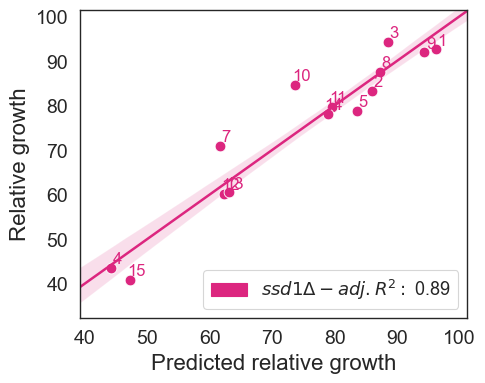

In [124]:
sns.set(rc={'figure.figsize': (5, 4)})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
m3_ssd1_notRNA = Fitlin_multi_mean(RG_ssd1, ['Model 2: Chr. cost', 'snoRNA', 'Retrotransposon'] , 'MEAN RG',  ['Predicted relative growth', 'Relative growth'], label = r'$ssd1\Delta - adj. R^2 : $ ', color = '#DC267F')

In [125]:
X = RG_ssd1[['Model 2: Chr. cost', 'snoRNA', 'Retrotransposon']]
y = list(RG_ssd1['MEAN RG'])

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = sm.add_constant(X)

y_pred = m3_ssd1_notRNA.predict(X)
resids = y_pred - y

residual_df = pd.DataFrame({'Chromosome': RG_ssd1['Chromosome'], 'm3-tRNA': resids})
tmp = residual_df.groupby('Chromosome', as_index=False).mean()
tmp = tmp.rename(columns={'m3-tNRA': 'm3-tRNA mean'})
tmp_std = residual_df.groupby('Chromosome', as_index=False).std()
tmp_std = tmp_std.rename(columns={'m3-tRNA': 'm3-TRNA std'})
del tmp_std['Chromosome']
tmp = tmp.join(tmp_std)
del tmp['Chromosome']
res_mean_df_S = res_mean_df_S.join(tmp)

In [126]:
res_mean_df.sort_values('m3 - m3-tRNA mean')

,Chromosome,m3 mean,m3 std,m3-tRNA,m3-TRNA std,m3 - m3-tRNA mean
0,1,-10.920332,3.122608,-10.956710,3.122608,0.036378
1,2,-3.090424,1.294305,-3.200948,1.294305,0.110524
13,15,10.609891,5.044681,10.381735,5.044681,0.228156
12,14,1.199726,5.204089,0.936214,5.204089,0.263512
14,16,7.547418,4.897183,7.176011,4.897183,0.371407
6,8,-10.443300,2.880148,-10.967180,2.880148,0.523881
11,13,1.163479,5.674153,0.625686,5.674153,0.537793
10,12,-7.317321,4.775056,-7.980627,4.775056,0.663305
3,4,5.655526,2.374512,4.915128,2.374512,0.740398
7,9,-14.412346,2.655826,-15.476203,2.655826,1.063857


In [127]:
res_mean_df_S['m3 - m3-tRNA mean'] = np.abs(np.abs(res_mean_df_S['m3 mean']) -np.abs(res_mean_df_S['m3-tRNA']))
res_mean_df_S.sort_values('m3 - m3-tRNA mean')

,Chromosome,m3 mean,m3 std,m3-tRNA,m3-TRNA std,m3 - m3-tRNA mean
0,1,-21.494511,2.196913,-21.487122,2.196913,0.007389
1,2,-14.862657,1.793647,-14.927620,1.793647,0.064963
13,15,16.978067,3.338664,16.879987,3.338664,0.098080
12,14,-11.507736,1.545585,-11.808835,1.545585,0.301100
11,13,2.123911,5.149765,1.416204,5.149765,0.707707
6,8,-18.191999,3.308721,-18.951631,3.308721,0.759632
10,12,2.578548,3.802682,1.697300,3.802682,0.881248
3,4,14.277377,1.770857,13.376938,1.770857,0.900439
7,9,-19.664532,3.242489,-21.350986,3.242489,1.686454
9,11,-11.416887,1.603611,-13.242500,1.603611,1.825613
